
<h1><center> <font color='black'>  Network Science (LTAT.02.011) - Homework - 05  (Total points - 9)</font></center></h1>
<h2><center> <font color='black'> Introduction to Network Analysis</font></center></h3>
<h2><center> <font color='black'> University of Tartu</font></center></h3>


# Homework Instructions


- Please provide the names and student IDs of the team-members (Maximum 2 person) in the field "Team mates" below. If you are not working in a team please insert only your name and student ID. 

- ONLY one of the teammates should submit the homework. We will grade the homework and the marks and feedback is applied for both the team members. So please communicate with your team member about marks and feedback if you are submit the homework.


- The accepted submission format is .ipynb file. Please upload the file on moodle.

- The submission will automatically close on **<font color='red'>19th May 2021 at 23:59 pm</font>**, so please make sure you have enough time to submit the homework. 

- You do not necessarily need to work on Colab. Especially as the size and the complexity of datasets will increase through the course, you can install jupyter notebooks locally and work from there.

- If you do not understand what a question is asking for, please ask in Moodle. 

- Please Click on "**Restart and Run All**" before uploading the '.ipynb' file.

- Plagiarism is <font color='red'>**PROHIBITED**</font>. Any form of plagiarism will be dealt according to the university policy (https://www.ut.ee/en/current-students/academic-fraud).

- **Note: The tasks which involves writing your thoughts should not contain more than 3-4 sentences. It should be clear and concise.**


**<h2><font color='red'>Student info:</font></h2>**


<font color='red'>Full name: </font> Hannula-Katrin Pandis, Canberk Özen

<font color='red'>Student ID: </font> B04920, B97964



In [ ]:
import networkx as nx
import itertools
import pandas as pd
import numpy as np
!pip install ndlib
import ndlib.models.ModelConfig as mc
import ndlib.models.epidemics as ep
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend
import matplotlib.pyplot as plt
import plotly.graph_objects as go
%matplotlib inline

     |████████████████████████████████| 102kB 5.6MB/s 
     |████████████████████████████████| 3.2MB 22.6MB/s 
no display found. Using non-interactive Agg backend


# 1. SIR: Susceptible-Infected-Recovered (9 points)

Each individual has β contacts with randomly chosen others individuals per unit time.

Each infected individual has μ probability of becoming immune after being infected.

## 1.1 Network creation (3 points)

In this exercise we will create three different networks:
1. Erdos-Renyi random network (1000 nodes connected with probability 0.1)
2. Watts–Strogatz small-world network (1000 nodes connected with k=3 and probability 0.1)
3. Barabási–Albert preferential attachment network (1000 nodes connected with degree 3)

Hint: 
- Refer lab 03

In [ ]:
er = nx.erdos_renyi_graph(1000, 0.1)
ws = nx.watts_strogatz_graph(n = 1000, k = 3, p = 0.1)
ba = nx.barabasi_albert_graph(1000, 3)

## 1.2 Plot susceptible at time stamp 100 with infection and recovery rates between 0 and 1 (6 points) 

In [ ]:
def SIR_model(net, infection_rate, recovery_rate):
  model = ep.SIRModel(net)
  model.available_statuses
  cfg = mc.Configuration()
  cfg.add_model_parameter('beta', infection_rate) # infection rate
  cfg.add_model_parameter('gamma', recovery_rate) # recovery rate
  cfg.add_model_parameter("percentage_infected", 0.01)
  model.set_initial_status(cfg)

  iterations = model.iteration_bunch(100, node_status=True)
  trends = model.build_trends(iterations)

  viz = DiffusionTrend(model, trends)
  viz.plot()
  return trends

100%|██████████| 100/100 [00:01<00:00, 88.24it/s]


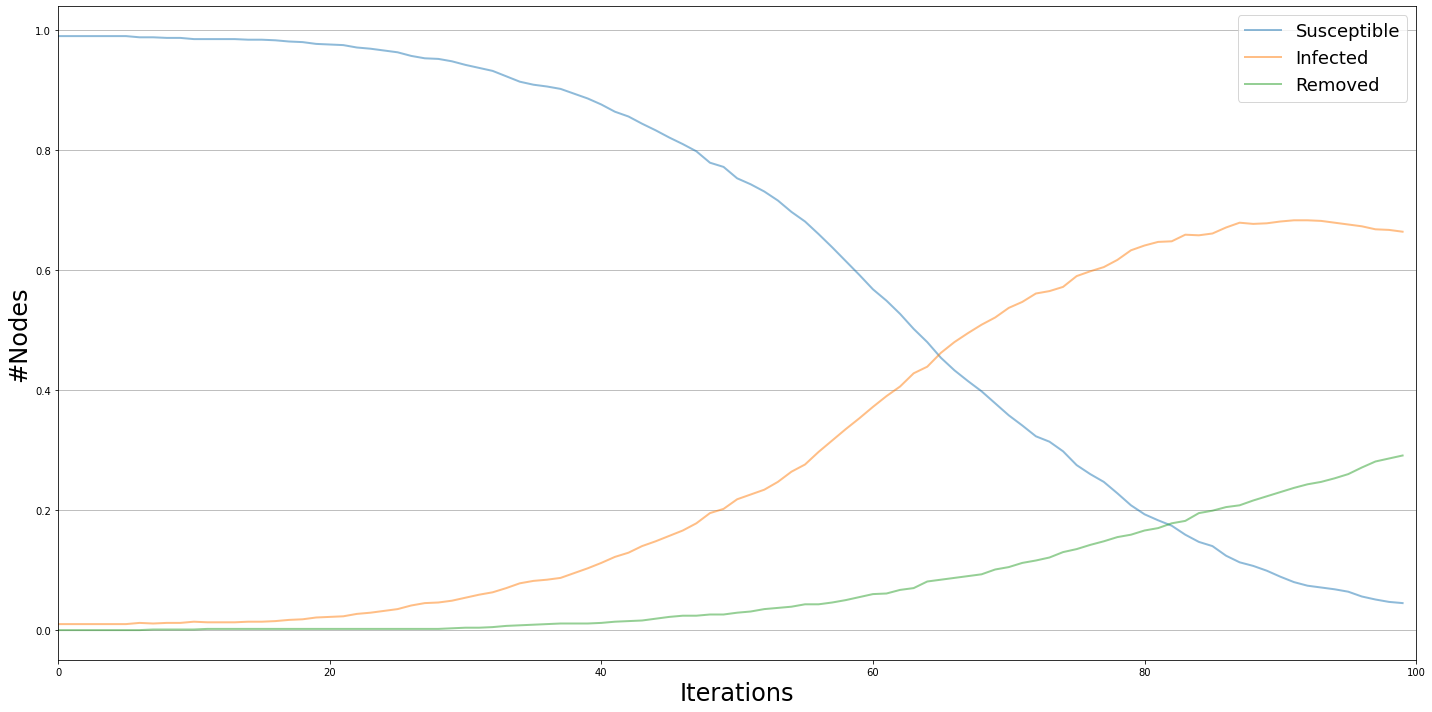

In [ ]:
trends = SIR_model(er, 0.001, 0.01)

### 1.2.1 Return number of susceptible nodes at timestamp 100 (1.5 points)
**<font color='red'>Note: This simulation will take around one hour.</font>**

In [ ]:
def SIR_model_S_inf(net, infection_rate, recovery_rate):
  model = ep.SIRModel(net)
  model.available_statuses
  cfg = mc.Configuration()
  cfg.add_model_parameter('beta', infection_rate) # infection rate
  cfg.add_model_parameter('gamma', recovery_rate) # recovery rate
  cfg.add_model_parameter("percentage_infected", 0.01)
  model.set_initial_status(cfg)

  iterations = model.iteration_bunch(100, node_status=True)
  trends = model.build_trends(iterations)
  return list(list(list(trends[0].values())[0].values())[0].values())[0][99] #### TODO

In [ ]:
a = list(np.arange(0, 1.01, 0.02))
df = pd.DataFrame(list(itertools.product(a,a)), columns=['infection_rate', 'recovery_rate'])
df['er'] = 0
df['ws'] = 0
df['ba'] = 0
df.head()

,infection_rate,recovery_rate,er,ws,ba
0,0.0,0.00,0,0,0
1,0.0,0.02,0,0,0
2,0.0,0.04,0,0,0
3,0.0,0.06,0,0,0
4,0.0,0.08,0,0,0


In [ ]:
for i in range(len(df)):
  df.loc[i,'er'] = SIR_model_S_inf(er, df.loc[i,'infection_rate'],df.loc[i,'recovery_rate'])
  df.loc[i,'ws'] = SIR_model_S_inf(ws, df.loc[i,'infection_rate'],df.loc[i,'recovery_rate'])
  df.loc[i,'ba'] = SIR_model_S_inf(ba, df.loc[i,'infection_rate'],df.loc[i,'recovery_rate'])

df.head()

Voogesituse väljund on kärbitud viimase 5000 reani.
100%|██████████| 100/100 [00:00<00:00, 554.71it/s]


,infection_rate,recovery_rate,er,ws,ba
0,0.0,0.00,990,990,990
1,0.0,0.02,990,990,990
2,0.0,0.04,990,990,990
3,0.0,0.06,990,990,990
4,0.0,0.08,990,990,990


In [ ]:
df

,infection_rate,recovery_rate,er,ws,ba
0,0.0,0.00,990,990,990
1,0.0,0.02,990,990,990
2,0.0,0.04,990,990,990
3,0.0,0.06,990,990,990
4,0.0,0.08,990,990,990
...,...,...,...,...,...
2596,1.0,0.92,0,0,0
2597,1.0,0.94,0,0,0
2598,1.0,0.96,0,0,0
2599,1.0,0.98,0,0,0


In [ ]:
df['er']
df.er.unique()

array([990,   0,   1,   3,   6,   4,   7,  10,   9,  16,  14,  13,  27,
        19,  43,  33,  42,  56,  66,  57,  76,  84,  82,  95, 138, 118,
       132, 139, 154, 148, 156, 179, 213, 212,   2,   8,   5,  11,  17])

In [ ]:
df['ws']
df.ws.unique()

array([990, 947, 978, 985, 983, 989, 986, 988, 987, 920, 974, 966, 982,
       979, 981, 984, 875, 942, 953, 970, 767, 936, 937, 967, 972, 783,
       905, 913, 977, 969, 980, 976, 715, 847, 908, 945, 946, 965, 957,
       709, 791, 886, 963, 968, 975, 638, 853, 867, 860, 952, 962, 496,
       728, 879, 889, 948, 959, 971, 475, 731, 720, 910, 903, 949, 961,
       955, 516, 699, 837, 888, 916, 954, 960, 958, 477, 723, 807, 869,
       887, 895, 934, 941, 951, 973, 268, 572, 766, 863, 917, 899, 944,
       935, 950, 247, 594, 718, 788, 902, 927, 890, 939, 933, 964, 241,
       471, 691, 781, 883, 851, 926, 940, 956, 246, 405, 862, 840, 906,
       872, 904, 912, 153, 521, 692, 786, 838, 884, 918, 579, 632, 685,
       835, 852, 932, 900, 928, 943, 217, 577, 725, 833, 923, 914, 915,
       155, 440, 710, 772, 790, 823, 793, 871, 861, 891, 929, 930, 111,
       311, 812, 543, 797, 794, 773, 815, 922, 896, 124, 347, 557, 689,
       854, 885, 724, 843, 859, 921, 868, 909, 102, 319, 679, 38

In [ ]:
df['ba']
df.ba.unique()

array([990,  14,  94, 260, 426, 513, 974, 802, 784, 915, 986, 970, 980,
       960, 989, 987, 942, 988, 976, 984, 982,   0,  21,  87, 162, 302,
       339, 399, 479, 554, 592, 636, 708, 769, 846, 836, 906, 972, 981,
       983, 871, 978, 971, 918, 973, 985,   7,  29,  63, 105, 178, 233,
       268, 280, 373, 377, 505, 460, 416, 539, 689, 649, 725, 694, 874,
       804, 792, 787, 863, 904, 930, 901, 938, 927, 969, 955, 968, 977,
         3,  26,  38,  70, 113, 147, 181, 239, 266, 292, 427, 396, 481,
       488, 431, 652, 550, 654, 609, 648, 681, 658, 696, 709, 818, 848,
       895, 952, 789, 905, 950, 925, 885, 956, 922,   1,  18,  33,  35,
        96, 139, 142, 151, 209, 228, 242, 273, 304, 374, 390, 442, 393,
       466, 483, 499, 547, 632, 580, 646, 651, 618, 685, 732, 764, 738,
       907, 736, 760, 755, 858, 805, 809, 888, 957, 862,  17,  68,  76,
       124, 116, 146, 211, 196, 247, 275, 344, 320, 342, 334, 414, 445,
       403, 428, 455, 474, 542, 695, 614, 544, 624, 625, 742, 70

### 1.2.2 Plot number of susceptible nodes at timestamp 100 for Erdos-Renyi random network and explain in brief (1.5 points) 

In [ ]:
fig = go.Figure(data=go.Heatmap(
          x = df['infection_rate'] , #TODO, #infectin rates 
          y = df['recovery_rate'] , #TODO, #recovery rates
          z = df['er'] , #TODO, #susceptible nodes 
          type = 'heatmap',
    colorbar=dict(title='Susceptible At T=100')))

fig.update_layout(
    xaxis_title="Infection rate",
    yaxis_title="Recovery rate",
    font_size = 18
)


fig.show()

**<font color='red'>Your answer:</font>** According to the heatmap, we can say that Erdos-Renyi network is highly susceptible to infections, even at a rate of 0.02 we see that the whole network gets infected even if the recovery rate is high. After an infection rate of 0.08, all the nodes gets infected at least once.

This result is somewhat expected since Erdos-Renyi graph is quite connected, with its degree distribution generally taking high values. The high number of connections in the graph results in an infection spreading quickly.

### 1.2.3 Plot number of susceptible nodes at timestamp 100 for Watts–Strogatz small-world network and explain in brief (1.5 points) 

In [ ]:
fig = go.Figure(data=go.Heatmap(
          x = df['infection_rate'] , #TODO, #infectin rates
          y = df['recovery_rate'] , #TODO, #recovery rates  
          z = df['ws'] , #TODO, #susceptible nodes  
          type = 'heatmap',
    colorbar=dict(title='Susceptible At T=100')))

fig.update_layout(
    xaxis_title="Infection rate",
    yaxis_title="Recovery rate",
    font_size = 18
)


fig.show()

**<font color='red'>Your answer:</font>** WS model is quite robust to high infection rates, even when the infection rate is around 0.8 we see that more than half of the population manages to be able to stay healthy at nearly all recovery rates. However, when the infection rate gets closer to 1.0, we -naturally- see that nearly all of the nodes lose their susceptible status, ie either they all die from the virus or recover from it.

Compared to other graphs, WS model is the least connected, with most of nodes having only one connection. This resulted in much weaker spread.

### 1.2.4 Plot number of susceptible nodes at timestamp 100 for Barabási–Albert preferential attachment network and explain in brief (1.5 points) 

In [ ]:
fig = go.Figure(data=go.Heatmap(
          x = df['infection_rate'] , #TODO, #infectin rates  
          y = df['recovery_rate'] , #TODO, #recovery rates  
          z = df['ba'] , #TODO, #susceptible nodes  
          type = 'heatmap',
    colorbar=dict(title='Susceptible At T=100')))

fig.update_layout(
    xaxis_title="Infection rate",
    yaxis_title="Recovery rate",
    font_size = 18
)


fig.show()

**<font color='red'>Your answer:</font>** The heatmap of Barabasi-Albert network is a bit of a middle ground between those of the two other networks' we have just interpreted.

The network mostly manages to stay healthy as long as the infection rates are smaller than 0.1 and recovery rate is bigger than ~0.45. But as the infection rate increases and passes the threshold value of 0.2, more than half of the nodes get infected even at a recovery rate of 1.0. After an infection rate of 0.46, at least 90% of nodes get infected at least once, no matter the recovery rate.

BA model was a bit less densely connected than the ER model(with reference to lab 3), thus the heatmap we just saw is not surprising.

## How long did it take you to solve the homework?

* Please answer as precisely as you can. It does not affect your points or grade in any way. It is okay, if it took 0.5 hours or 24 hours. The collected information will be used to improve future homeworks. Please change X in the next cell into your estimate.

<font color='red'> **Answer:** </font> 5 hours




## What is the level of difficulty for this homework?
you can put only number between $0:10$ ($0:$ easy, $10:$ difficult)

<font color='red'> **Answer:** </font> 6